<a href="https://colab.research.google.com/github/tracijo32/astralar/blob/master/animations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Walabot-Data/data-csv/'

In [0]:
import pandas as pd
import numpy as np

In [0]:
def read_rawimage(file,slices=np.arange(-45,45,8),nozero=True):
    df = pd.read_csv(file,header=None)
    image_cols = df.iloc[:,:-4].astype(str)
    last_col = df.iloc[:,-2]/100*(180/np.pi)
    new_last_col = last_col.apply(lambda x: np.abs(x-slices).argmin())
    image = image_cols.apply(lambda col: np.array(eval(','.join(col.to_list()))).astype(float),axis=1)
    new_df = pd.DataFrame({'Image':image,'Slice':new_last_col})
    if nozero:
        new_df = new_df[new_df['Image'].apply(lambda x: np.max(x)) > 0]
    return new_df

In [0]:
fullclip1 = read_rawimage(root_path+'data-RawImage-fullMag-0619.csv')
emptyclip1 = read_rawimage(root_path+'data-RawImage-empty-0619.csv')
pipe1 = read_rawimage(root_path+'data-RawImage-pipe-0619.csv')

In [0]:
fullclip2 = read_rawimage(root_path+'data-RawImage-fullMag-0620.csv')
emptyclip2 = read_rawimage(root_path+'data-RawImage-empty-0620.csv')
pipe2 = read_rawimage(root_path+'data-RawImage-pipe-0620.csv')

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [0]:
def save_animation(df,interval=50,title='',file=''):
    fig = plt.figure(figsize=(3,3))
    ims = []
    for i,image in enumerate(df['Image']):
        im = plt.imshow(np.array(image),animated=True)
        label = plt.title(title)
        plt.xticks([])
        plt.yticks([])
        ims.append([im])
    ani = animation.ArtistAnimation(fig,ims,interval=interval,blit=True,repeat_delay=0,repeat=True)
    ani.save(file)

In [0]:
def generate_images(df,n_images=15,n_slices=12):
    xdim,ydim = df['Image'].iloc[0].shape
    full_stack = []
    for slc in range(n_slices):
        df_slc = df[df['Slice']==slc]
        if len(df_slc) == 0:
            sample_slc = np.zeros((n_images,xdim,ydim))
        else:
            sample_slc = np.stack(df_slc.sample(n_images,replace=True)['Image'].to_list())
        full_stack.append(sample_slc)
        
    full_stack = np.stack(full_stack,axis=3)
    
    return full_stack

In [0]:
fc1_stack = generate_images(fullclip1)
fc2_stack = generate_images(fullclip2)
ec1_stack = generate_images(emptyclip1)
ec2_stack = generate_images(emptyclip2)
p1_stack = generate_images(pipe1)
p2_stack = generate_images(pipe2)

In [36]:
pip install celluloid

In [0]:
from celluloid import Camera

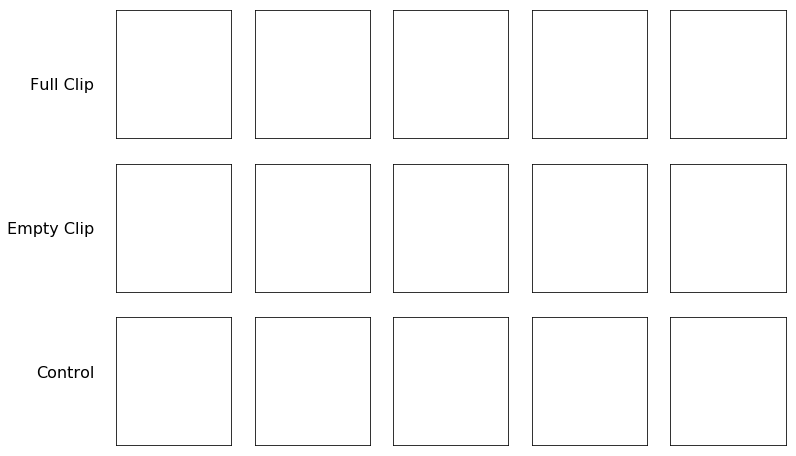

In [64]:
fig, ax = plt.subplots(3,5,figsize=(12,8))
cam = Camera(fig)
dfs = [fc1_stack,ec1_stack,p1_stack]
for i in range(12):
    for j in range(5):
        for k,df in enumerate(dfs):
            ax[k,j].imshow(df[j,:,:,i])
            ax[k,j].set_xticks([])
            ax[k,j].set_yticks([])
    cam.snap()
fig.text(0.10,0.75,'Full Clip',size=16,ha='right',va='center')
fig.text(0.10,0.50,'Empty Clip',size=16,ha='right',va='center')
fig.text(0.10,0.25,'Control',size=16,ha='right',va='center')
anim = cam.animate(interval=500,repeat_delay=2000)
anim.save(root_path+'datacube.mp4')
HTML(anim.to_html5_video())
        